In [1]:
weather = weather = pd.read_csv("weather_imputation.csv")

station = weather[weather['station_nbr'] == 7]
station.reset_index(drop=True, inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day
1030,7,2014-10-27,84.0,64.0,74.0,NaN,52.0,60.0,0.0,9.0,...,0.0,0.0,28.42,29.73,7.5,21.0,15.8,2014,10,27
1031,7,2014-10-28,69.0,43.0,56.0,NaN,40.0,49.0,9.0,0.0,...,0.0,0.0,28.75,30.09,8.1,3.0,8.6,2014,10,28
1032,7,2014-10-29,73.0,40.0,57.0,NaN,37.0,47.0,8.0,0.0,...,0.0,0.0,28.78,30.16,3.5,19.0,4.0,2014,10,29
1033,7,2014-10-30,77.0,52.0,65.0,NaN,40.0,51.0,0.0,0.0,...,0.0,0.0,28.77,30.13,3.0,28.0,11.3,2014,10,30
1034,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,...,0.0,0.0,29.00,30.37,11.0,1.0,11.6,2014,10,31


In [2]:
station['date'] = pd.to_datetime(station['date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [3]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 35 ( 3.38 % )
tmin : 34 ( 3.29 % )
tavg : 41 ( 3.96 % )
depart : 1035 ( 100.0 % )
dewpoint : 37 ( 3.57 % )
wetbulb : 42 ( 4.06 % )
heat : 41 ( 3.96 % )
cool : 41 ( 3.96 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 57 ( 5.51 % )
preciptotal : 1 ( 0.1 % )
stnpressure : 1 ( 0.1 % )
sealevel : 39 ( 3.77 % )
resultspeed : 3 ( 0.29 % )
resultdir : 3 ( 0.29 % )
avgspeed : 3 ( 0.29 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )


##### finding : tavg, heat, cool
- tavg = (tmin + tmax) / 2 
- 65 - heat = tavg
- 65 + cool = tavg

##### tmax와 tmin의 평균을 tavg에 넣어준다.

In [4]:
# tmax와 tmin의 평균을 tavg에 넣어준다.
station['tavg'] = (station.tmax + station.tmin) / 2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### heat = 65 - tavg 대입

In [5]:
# heat = 65 - tavg
idx = station[station.heat.isna()].index
station.loc[idx,'heat'] = 65 - station.loc[idx,'tavg'] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


##### # cool = tavg - 65

In [6]:
# cool = tavg - 65
idx = station[station.cool.isna()].index
station.loc[idx,'cool'] = station.loc[idx,'tavg'] - 65

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 35 ( 3.38 % )
tmin : 34 ( 3.29 % )
tavg : 35 ( 3.38 % )
depart : 1035 ( 100.0 % )
dewpoint : 37 ( 3.57 % )
wetbulb : 42 ( 4.06 % )
heat : 35 ( 3.38 % )
cool : 35 ( 3.38 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 57 ( 5.51 % )
preciptotal : 1 ( 0.1 % )
stnpressure : 1 ( 0.1 % )
sealevel : 39 ( 3.77 % )
resultspeed : 3 ( 0.29 % )
resultdir : 3 ( 0.29 % )
avgspeed : 3 ( 0.29 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )


#### NaN값 : 해당 월의 평균값을 집어넣는다.
- column의 index를 뽑는다.
- index의 year와 month를 뽑는다.
- 해당 nan값의 year, month column평균을 낸다.
- 적용 후 tavg, heat, cool을 구한다.

In [8]:
# idxs = station[station['depart'].isna().values].index
# year = station.loc[idxs[0],'year']
# month = station.loc[idxs[0],'month']
# year, month

In [9]:
# ym = station[station['year']==year][station['month']==month]
# station.loc[idxs[0],'depart'] = ym['depart'].mean()

### 여러 column에 적용해보자

In [10]:
for column in station.columns[2:8]:
    idxs = station[station[column].isna().values].index
    for idx in idxs:
        year = station.loc[idx,'year']
        month = station.loc[idx,'month']
        ym = station[station['year']==year][station['month']==month]
        station.loc[idx,column] = ym[column].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 35 ( 3.38 % )
cool : 35 ( 3.38 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 57 ( 5.51 % )
preciptotal : 1 ( 0.1 % )
stnpressure : 1 ( 0.1 % )
sealevel : 39 ( 3.77 % )
resultspeed : 3 ( 0.29 % )
resultdir : 3 ( 0.29 % )
avgspeed : 3 ( 0.29 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )


##### 한번더  더해준다 : tavg, heat, cool
- tavg = (tmin + tmax) / 2 
- 65 - heat = tavg
- 65 + cool = tavg

In [12]:
# heat = 65 - tavg
idx = station[station.heat.isna()].index
station.loc[idx,'heat'] = 65 - station.loc[idx,'tavg'] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


##### # cool = tavg - 65

In [13]:
# cool = tavg - 65
idx = station[station.cool.isna()].index
station.loc[idx,'cool'] = station.loc[idx,'tavg'] - 65

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
for column in station.columns[13:18]:
    idxs = station[station[column].isna().values].index
    for idx in idxs:
        year = station.loc[idx,'year']
        month = station.loc[idx,'month']
        ym = station[station['year']==year][station['month']==month]
        station.loc[idx,column] = ym[column].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 3 ( 0.29 % )
avgspeed : 3 ( 0.29 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )


In [16]:
for column in station.columns[19:20]:
    idxs = station[station[column].isna().values].index
    for idx in idxs:
        year = station.loc[idx,'year']
        month = station.loc[idx,'month']
        ym = station[station['year']==year][station['month']==month]
        station.loc[idx,column] = ym[column].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 3 ( 0.29 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )


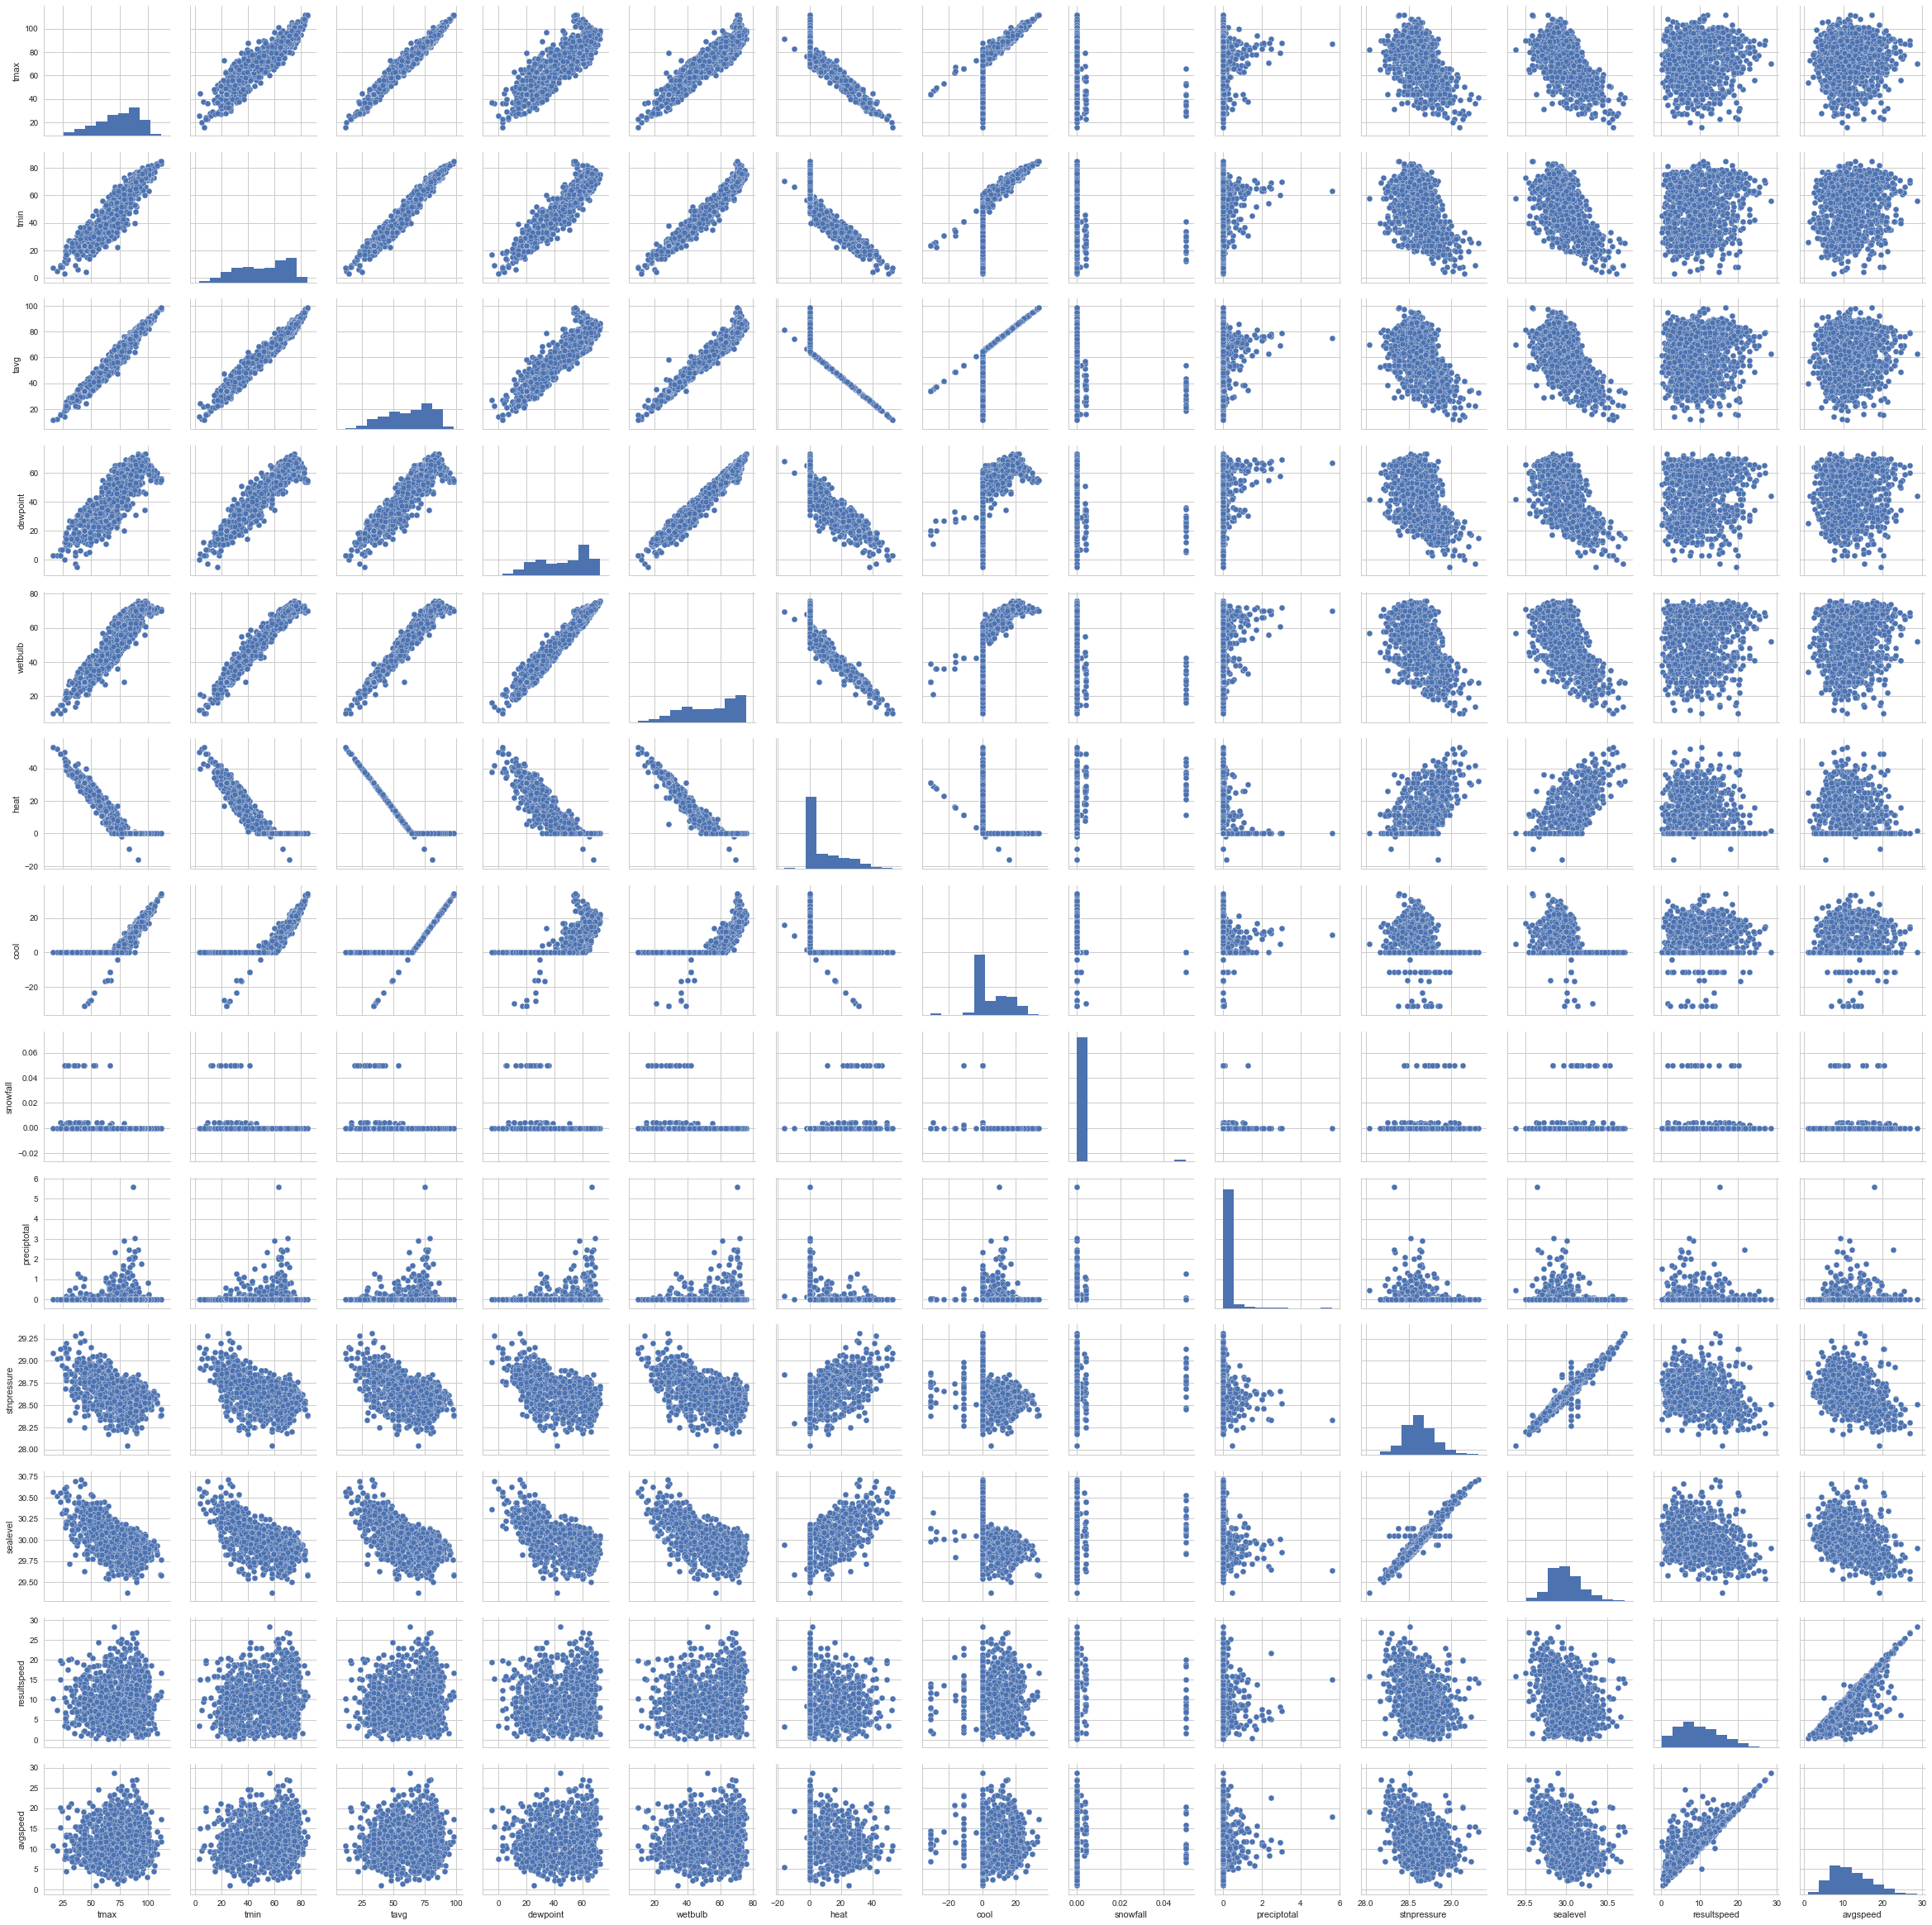

In [18]:
cols = ['tmax','tmin','tavg','dewpoint','wetbulb','heat','cool','snowfall','preciptotal','stnpressure','sealevel','resultspeed','avgspeed']
sns.pairplot(station[cols])
plt.show()